In [66]:
# CNN for classification task 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from PIL import Image
from IPython.display import display
import cv2

In [67]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("Training dataset images shape: " +str(x_train.shape))
print("Training dataset labels shape: " +str(y_train.shape))
print()
print("Test dataset images shape: " +str(x_test.shape))
print("Test dataset labels shape: " +str(y_test.shape))

Training dataset images shape: (50000, 32, 32, 3)
Training dataset labels shape: (50000, 1)

Test dataset images shape: (10000, 32, 32, 3)
Test dataset labels shape: (10000, 1)


Train image id:1


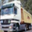

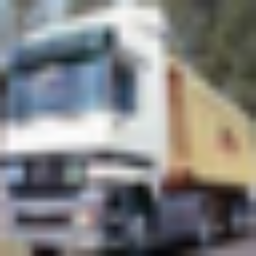

Label:[9]
Train image id:32


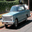

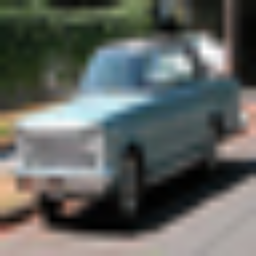

Label:[1]
Train image id:4353


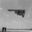

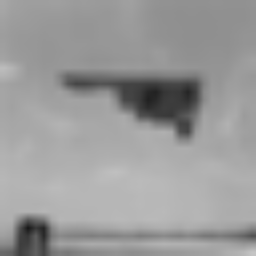

Label:[0]
Train image id:4343


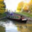

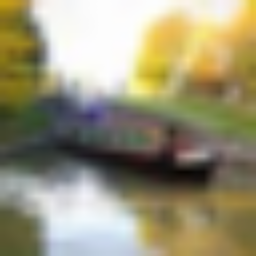

Label:[8]
Train image id:93


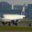

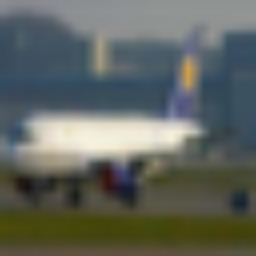

Label:[0]


In [68]:
#RGB image 32x32x3
test_images_ids= [1, 32, 4353, 4343, 93]
for i in test_images_ids:
  test_image = x_train[i]
  test_image_object = Image.fromarray(test_image)
  print("Train image id:"+str(i))
  display(test_image_object)
  test_image = cv2.resize(test_image,(256,256))
  test_image= Image.fromarray(test_image)
  display(test_image)
  print("Label:" +str(y_train[i]))

In [69]:
num_classes = 10 
y_train_onehot= keras.utils.to_categorical(y_train,num_classes)
y_test_onehot= keras.utils.to_categorical(y_test,num_classes)
for i in test_images_ids:
  print("label of the first example before one-hot encoding"+str(y_train[i]))
  print("label of the firest training example after one-hot encoding"+str(y_train_onehot[i]))

label of the first example before one-hot encoding[9]
label of the firest training example after one-hot encoding[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
label of the first example before one-hot encoding[1]
label of the firest training example after one-hot encoding[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
label of the first example before one-hot encoding[0]
label of the firest training example after one-hot encoding[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
label of the first example before one-hot encoding[8]
label of the firest training example after one-hot encoding[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
label of the first example before one-hot encoding[0]
label of the firest training example after one-hot encoding[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [76]:
from keras.backend import categorical_crossentropy
# Model Definition
def NN_Model():
  model = Sequential()
  # add layer  
  # (conv2d(feature_maps,kernel_size)
  model.add(Conv2D(64,kernel_size=3,activation="relu",input_shape=(32,32,3), padding='same'))
  model.add(Conv2D(64,kernel_size=3,activation="relu", padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  #Flatten the produced feature maps and make a single row vector
  model.add(Conv2D(256,kernel_size=3,activation="relu", padding='same'))
  model.add(Conv2D(256,kernel_size=3,activation="relu", padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(256,kernel_size=3,activation="relu", padding='same'))
  model.add(Conv2D(256,kernel_size=3,activation="relu", padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  #Add the neurons of the weights
  model.add(Dense(100,activation='relu'))
  #Add output layer
  model.add(Dense(10,activation='softmax'))

  #It is suitable for classifiers that use softmax output (cost function is cattegorical cross entropy type)
  model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])  #optimizer is the algorithm that is used to update the DEnse layer of the weights
  #Adam is a variation of gradient decend optimizer. Specifically we update the number of 
  #training images in batches, We use Adam optimizer to add up the output loss values and 
  #Then we look only on the first batch and we update the weight based on the added loss of the first batch
  # So we have localized the training in batches and then we have trained one epoch.
  #model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.SGD(learning_rate=0.0001,momentum=0.002), metrics=['accuracy'])  #optimizer is the algorithm that is used to update the DEnse layer of the weights
  # Steepest descent performs really bad in this kind of application
  return model


In [72]:
#model_4 = NN_Model()
#model_4.summary()


AttributeError: ignored

In [77]:
model_5 = NN_Model()
model_5.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_76 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 16, 16, 256)       147712    
                                                                 
 conv2d_78 (Conv2D)          (None, 16, 16, 256)       590080    
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 8, 8, 256)        0         
 g2D)                                                

In [ ]:
epoch = 10
batch_size = 256
history_4 = model_4.fit(x_train,y_train_onehot, batch_size=batch_size, epochs=epoch,verbose=1, validation_data=(x_test,y_test_onehot))

In [78]:
epoch = 10
batch_size = 256
history_5 = model_5.fit(x_train,y_train_onehot, batch_size=batch_size, epochs=epoch,verbose=1, validation_data=(x_test,y_test_onehot))

Epoch 1/10
196/196 [==============================] - 47s 235ms/step - loss: 2.0844 - accuracy: 0.3434 - val_loss: 1.4518 - val_accuracy: 0.4854
Epoch 2/10
196/196 [==============================] - 15s 75ms/step - loss: 1.3452 - accuracy: 0.5230 - val_loss: 1.3886 - val_accuracy: 0.5141
Epoch 3/10
196/196 [==============================] - 15s 76ms/step - loss: 1.1519 - accuracy: 0.6001 - val_loss: 1.1548 - val_accuracy: 0.5951
Epoch 4/10
196/196 [==============================] - 15s 74ms/step - loss: 0.9836 - accuracy: 0.6619 - val_loss: 1.0977 - val_accuracy: 0.6187
Epoch 5/10
196/196 [==============================] - 14s 74ms/step - loss: 0.8669 - accuracy: 0.7034 - val_loss: 0.9850 - val_accuracy: 0.6555
Epoch 6/10
196/196 [==============================] - 14s 74ms/step - loss: 0.7559 - accuracy: 0.7407 - val_loss: 0.9274 - val_accuracy: 0.6842
Epoch 7/10
196/196 [==============================] - 14s 74ms/step - loss: 0.6685 - accuracy: 0.7737 - val_loss: 0.9554 - val_accuracy

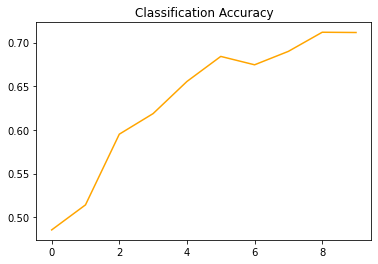

In [81]:
import matplotlib.pyplot as plt
plt.title('Classification Accuracy')
#plt.plot(history_3.history['val_accuracy'],color='orange',label='test-with-Adam_optimizer')
#plt.plot(plt.plot(history_4.history['val_accuracy'],color='orange',label='test'))
plt.plot(history_5.history['val_accuracy'],color='orange',label='test')

In [ ]:
prediction=model_3.predict(x_train)
prediction
display(prediction)